In [1]:
import pandas as pd

file_path = 'customer_segmentation_clean.csv'  
df = pd.read_csv(file_path)

df.head()

,Age_Group,Education,Marital_Status,Income,Kids,Dt_Customer,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
0,Elders,Graduate,Single,58138.0,0,663,58,1617,25,0,0,1
1,Elders,Graduate,Single,46344.0,2,113,38,27,6,0,0,0
2,Elders,Graduate,Partner,71613.0,0,312,26,776,21,0,0,0
3,Middle-Aged Adults,Graduate,Partner,26646.0,1,139,26,53,8,0,0,0
4,Middle-Aged Adults,Postgraduate,Partner,58293.0,1,161,94,422,19,0,0,0


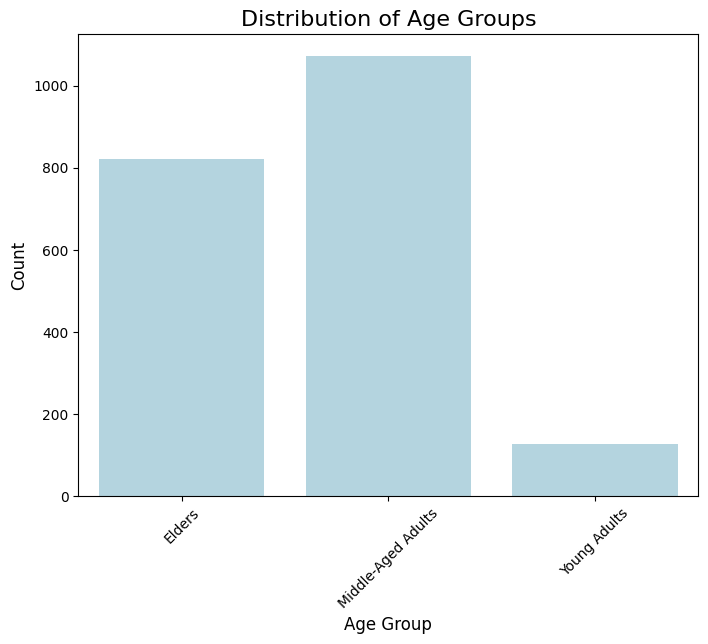

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân bố dữ liệu theo nhóm tuổi
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=df, color='lightblue')  # Dùng color thay vì palette
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

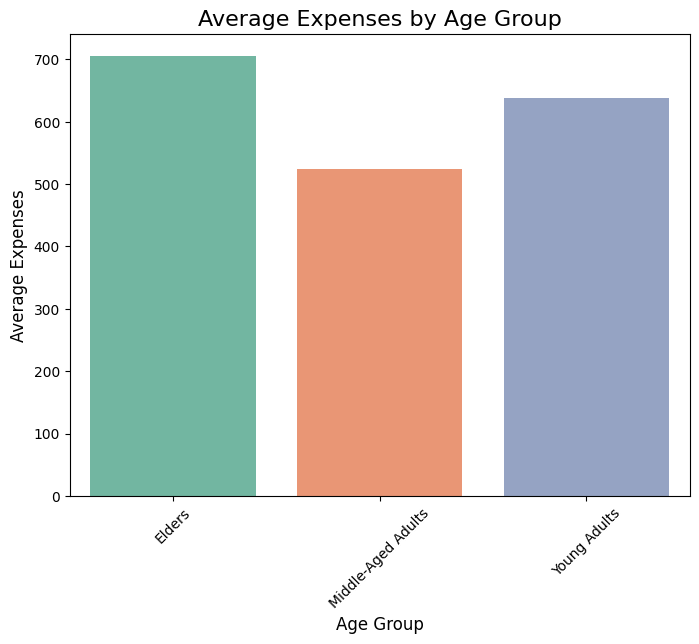

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính chi tiêu trung bình theo nhóm tuổi
age_group_expenses = df.groupby('Age_Group')['Expenses'].mean().reset_index()

# Vẽ biểu đồ thanh cho chi tiêu trung bình theo nhóm tuổi
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Expenses', data=age_group_expenses, hue='Age_Group', dodge=False, palette='Set2')
plt.title('Average Expenses by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Expenses', fontsize=12)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Loại bỏ legend nếu không cần thiết
plt.show()


# Nhận xét:
# + Nhóm "Elders" có chi tiêu trung bình cao nhất. 
# Nhóm "Middle-Aged Adults" có chi tiêu trung bình thấp hơn. 
# Nhóm "Young Adults" có chi tiêu trung bính thấp nhất

# Có sự chênh lệch chi tiêu các nhóm tuổi => có thể phân tích những nhu cầu và ưu tiên chi tiêu khác nhau dựa vào nhóm tuổi.
# Có tính đồnh nhất ( tính dao động ít).


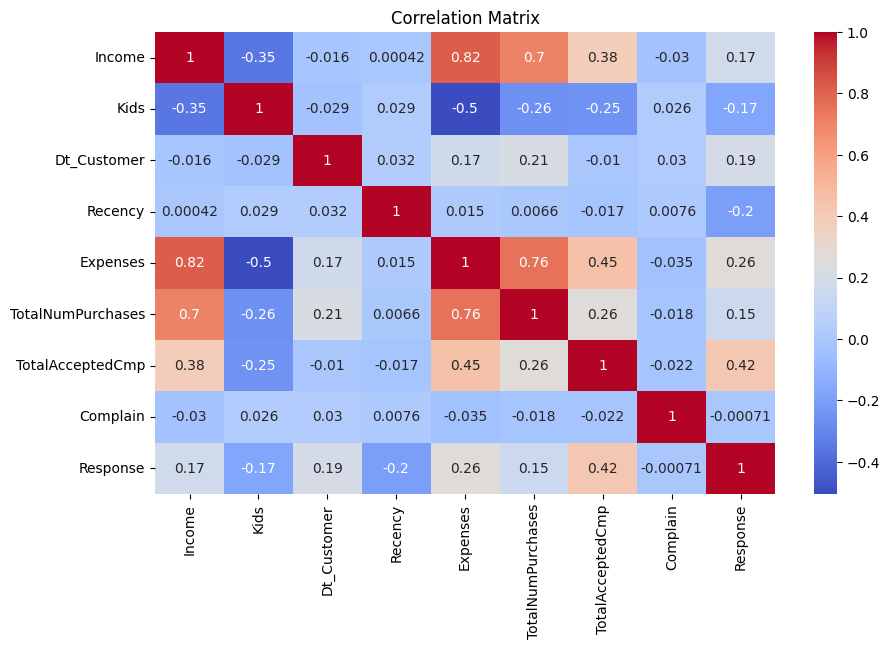

In [11]:
# Tương quan biến số:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chỉ chọn các cột có kiểu dữ liệu số
numeric_df = df.select_dtypes(include='number')

# Tính toán ma trận tương quan
correlation_matrix = numeric_df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Nhận xét:

#Tương quan mạnh
# + Income và Expenses có tương quan dương mạnh nhất =>  thu nhập và chi tiêu có mối liên hệ chặt chẽ.
# + Income và TotalNumPurchases cũng có tương quan dương mạnh => Người có thu nhập cao thì mua sắm nhiều hơn.

#Tương quan âm
# + Kids và Income có tương quan âm => gia đình có nhiều con có thể có thu nhập thấp hơn.
# + Kids và Expenses cũng có tương quan âm khá mạnh.

#Biến ít tương quan:
# + Recency có tương quan yếu với hầu hết các biến khác, với các giá trị gần 0.
# + Complain cũng tương tự =>  việc khiếu nại không liên quan nhiều đến các yếu tố khác.

#Tương quan trung bình:
# + TotalAcceptedCmp có tương quan dương trung bình 
#=> cho thấy mối liên hệ giữa việc chấp nhận chiến dịch marketing với thu nhập, chi tiêu và phản hồi.

#Tương quan giữa các biến liên quan:
#+ Expenses, TotalNumPurchases và Income đều có tương quan dương mạnh với nhau, 
#=>phản ánh mối quan hệ logic giữa thu nhập, chi tiêu và số lượng mua hàng.

#Biến Dt_Customer: Có tương quan yếu với hầu hết các biến khác, 
#ngoại trừ một tương quan dương nhẹ với TotalNumPurchases (0.21) và Response (0.19).

#Response:
#Có tương quan dương trung bình với TotalAcceptedCmp (0.42), 
#cho thấy mối liên hệ giữa việc phản hồi và chấp nhận chiến dịch marketing.

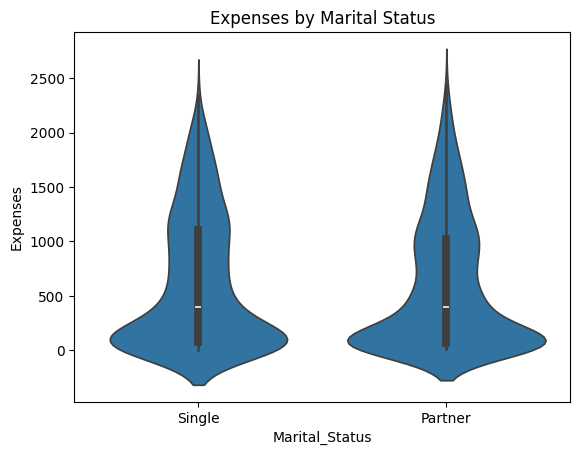

In [13]:
# Chi tiêu theo tình trạng hôn nhân
sns.violinplot(x='Marital_Status', y='Expenses', data=df)
plt.title('Expenses by Marital Status')
plt.show()

#Nhận xet:
# + 2 biểu đồ tương đối giống nhau.
# + Chi tiêu thấp lơn, chi tiêu cao hiếm gặp nhưng vẫn tồn tại.
# + Thanh màu trắng trên biểu đồ là chi tiêu trung bình (Tương đối bằng nhau).
# + Khoản chi tiêu phổ biến nhất là dưới 500.

# => Dữ liệu không tập trung vào 1 khoảng giá trị nhất định nào, mà trải rộng => Chi tiêu của họ trải rộng từ thấp đến cao.
# => Vẫn có ít người có chi tiêu rất cao, nhưng phần lớn ở chi tiêu mức vừa phải.


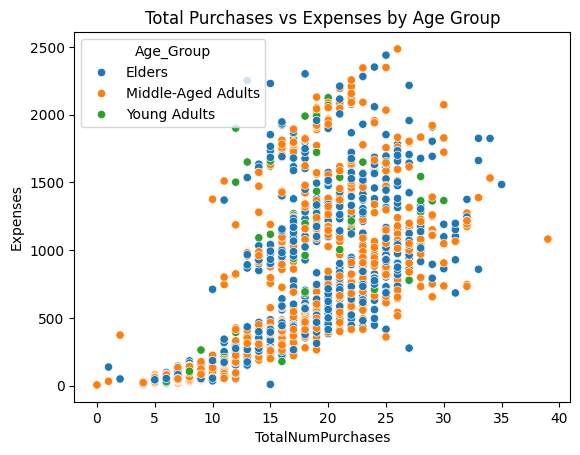

In [17]:
# Phân tích số lần mua hàng và tần suất giao dịch:
sns.scatterplot(x='TotalNumPurchases', y='Expenses', hue='Age_Group', data=df)
plt.title('Total Purchases vs Expenses by Age Group')
plt.show()

# Nhận xét:

#(TotalNumPurchases) và chi tiêu (Expenses) ở tất cả các nhóm tuổi. 
#=> Khi số lần mua hàng tăng, chi tiêu cũng tăng theo.

#Phân bố theo nhóm tuổi:
# Người trung niên (Middle-Aged Adults)  chiếm đa số.
# Người cao tuổi (Elders) có ít điểm dữ liệu hơn.
# Người trẻ (Young Adults) có ít điểm dữ liệu nhất.


#Mức chi tiêu:
#Người trung niên có xu hướng chi tiêu cao nhất, với nhiều điểm dữ liệu ở vùng trên của biểu đồ.
#Người cao tuổi có mức chi tiêu đa dạng, từ thấp đến cao.
#Người trẻ chi tiêu thấp nhất.


#Số lần mua hàng:
# Hầu hết các giao dịch tập trung trong khoảng 0-25 lần mua.
#Có một số ít khách hàng (chủ yếu là người trung niên và cao tuổi) có số lần mua hàng cao hơn 25.

#Điểm đặc biệt:
#Có một vài điểm dữ liệu ngoại lệ với số lần mua hàng rất cao (trên 30) và chi tiêu tương đối thấp, chủ yếu thuộc nhóm trung niên.
#Một số ít người cao tuổi có mức chi tiêu cao nhất trong mẫu.

#Nhận xét về Sự phân tán:
#Ở mức chi tiêu và số lần mua hàng thấp, các nhóm tuổi có sự chồng chéo đáng kể.
#Khi số lần mua hàng và chi tiêu tăng, sự phân biệt giữa các nhóm tuổi trở nên rõ ràng hơn.


#Tổng kết lại: Nhận xét về hàm ý kinh doanh:
# => Người trung niên dường như là nhóm khách hàng chính, với cả số lượng và giá trị giao dịch cao.
# => Có cơ hội tiềm năng để tăng số lần mua hàng và chi tiêu của nhóm khách hàng trẻ.
# => Chiến lược marketing có thể được điều chỉnh để phù hợp với hành vi mua sắm của từng nhóm tuổi.